# Apprenticeship Learning via IRL - Q Learning

In [1]:
import gym
import numpy as np
from tqdm import tqdm
import imageio
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, Image

from q_trainer import QTrainer 

## CartPole-v0

Observations

Num | Observation | Min | Max
---|---|---|---
0 | Cart Position | -4.8 | 4.8
1 | Cart Velocity | -Inf | Inf
2 | Pole Angle | ~ -0.418 rad (-24&deg;) | ~ 0.418 rad (24&deg;)
3 | Pole Velocity At Tip | -Inf | Inf

Actions:
Num | Action
--- | ---
0 | Push cart to the left
1 | Push cart to the right


Environment : CartPole-v0

Observation Space: Box(4,)

Action Space:  Discrete(2)

Initial State:  [-0.04886874 -0.0195981  -0.04897714 -0.01504107]

A step in the env: (array([-0.0492607 ,  0.17619078, -0.04927796, -0.32276575]), 1.0, False, {})


Rendered Environment: 


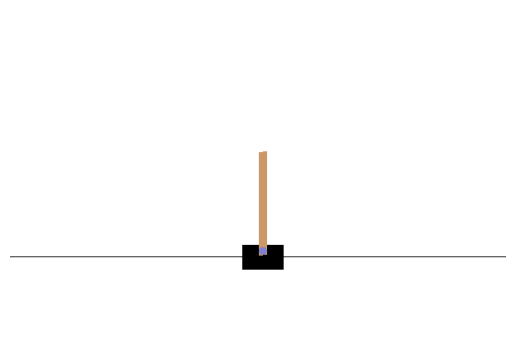

In [2]:
env = gym.make('CartPole-v0')
print('\nEnvironment : CartPole-v0')
print('\nObservation Space:', env.observation_space)
print('\nAction Space: ', env.action_space)
print('\nInitial State: ',env.reset())
print('\nA step in the env:', env.step(1))
print('\n\nRendered Environment: ')
env.reset()
plt.axis('off')
plt.imshow(env.render(mode='rgb_array'))
env.close()
plt.show()

## Training - Obtain Expert Policy

* Agent is trained using traditional Q-learning to obtain expert policy for Inverse Reinforcement Learning (IRL).

* Rewards from state-action pairs are stored in a 10000 x 2 array, with rows representing states and columns representing actions. Each cell in the array holds the reward associated with a specific state-action pair.

* The algorithm utilizes an epsilon-greedy approach to choose its actions during training iterations.

* The Q table, which is updated iteratively, represents the policy.

In [3]:
q_trainer = QTrainer(env, nbins=10, GAMMA=0.9, ALPHA=0.01)

print('\nNo. of bins for discretization: ', q_trainer.nbins)
print('\nNo. of states after discretization: ', len(q_trainer.states))



No. of bins for discretization:  10

No. of states after discretization:  14641


In [4]:
episode_lengths, episode_rewards, expert_Q = q_trainer.q_learning_train(num_episodes=30000)

Training Episodes..:   7%|█               | 2044/30000 [00:05<01:22, 337.56it/s]

Episode: 2000, Epsilon: 0.0224, Reward: 200.0


Training Episodes..:  14%|██▏             | 4051/30000 [00:11<01:18, 328.82it/s]

Episode: 4000, Epsilon: 0.0158, Reward: 200.0


Training Episodes..:  20%|███▏            | 6036/30000 [00:17<01:12, 330.87it/s]

Episode: 6000, Epsilon: 0.0129, Reward: 200.0


Training Episodes..:  27%|████▎           | 8059/30000 [00:23<01:05, 337.09it/s]

Episode: 8000, Epsilon: 0.0112, Reward: 200.0


Training Episodes..:  33%|█████          | 10040/30000 [00:29<00:59, 338.01it/s]

Episode: 10000, Epsilon: 0.0100, Reward: 200.0


Training Episodes..:  40%|██████         | 12052/30000 [00:35<00:53, 333.95it/s]

Episode: 12000, Epsilon: 0.0091, Reward: 200.0


Training Episodes..:  47%|███████        | 14048/30000 [00:41<00:47, 336.47it/s]

Episode: 14000, Epsilon: 0.0085, Reward: 200.0


Training Episodes..:  54%|████████       | 16053/30000 [00:47<00:41, 337.81it/s]

Episode: 16000, Epsilon: 0.0079, Reward: 200.0


Training Episodes..:  60%|█████████      | 18053/30000 [00:53<00:35, 333.61it/s]

Episode: 18000, Epsilon: 0.0075, Reward: 200.0


Training Episodes..:  67%|██████████     | 20055/30000 [00:59<00:29, 338.43it/s]

Episode: 20000, Epsilon: 0.0071, Reward: 200.0


Training Episodes..:  73%|███████████    | 22039/30000 [01:05<00:23, 342.01it/s]

Episode: 22000, Epsilon: 0.0067, Reward: 200.0


Training Episodes..:  80%|████████████   | 24034/30000 [01:11<00:17, 334.37it/s]

Episode: 24000, Epsilon: 0.0065, Reward: 200.0


Training Episodes..:  87%|█████████████  | 26037/30000 [01:17<00:11, 336.98it/s]

Episode: 26000, Epsilon: 0.0062, Reward: 200.0


Training Episodes..:  94%|██████████████ | 28053/30000 [01:23<00:06, 319.31it/s]

Episode: 28000, Epsilon: 0.0060, Reward: 200.0


Training Episodes..: 100%|███████████████| 30000/30000 [01:29<00:00, 335.59it/s]

Episode: 30000, Epsilon: 0.0058, Reward: 200.0


In [5]:
# Save Q table

with open('./data/Expert_Q_table', 'wb') as f:
    pickle.dump(expert_Q, f)
    print(f'Saved Expert Q Table')

Saved Expert Q Table


In [6]:
with open('./data/Expert_Q_table', 'rb') as file:
    expert_Q = pickle.load(file)
    print(f'Loaded Expert Q Table')

Loaded Expert Q Table


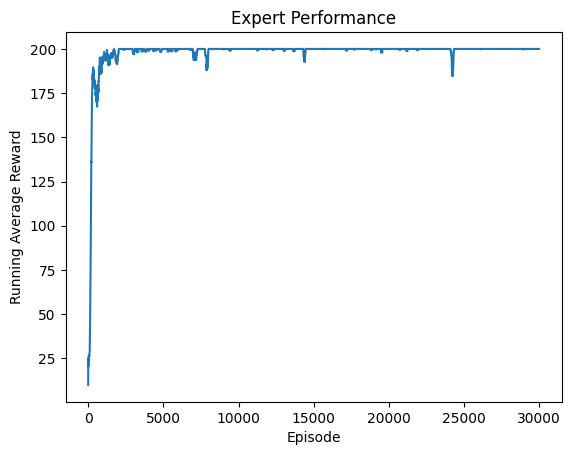

In [7]:
# Plot performance

q_trainer.plot_performance(episode_rewards,title="Expert Performance",save=True,
                 filename='../Results/Q - Learning IRL/Expert Performance')

In [8]:
# Training result
# Using the learned policy, simulate the environment 1000 times to sample the reward distribution.

expert_reward = q_trainer.run_policy(num_episodes=1000, render=False)

Running Policy...: 100%|███████████████████| 1000/1000 [00:02<00:00, 379.61it/s]


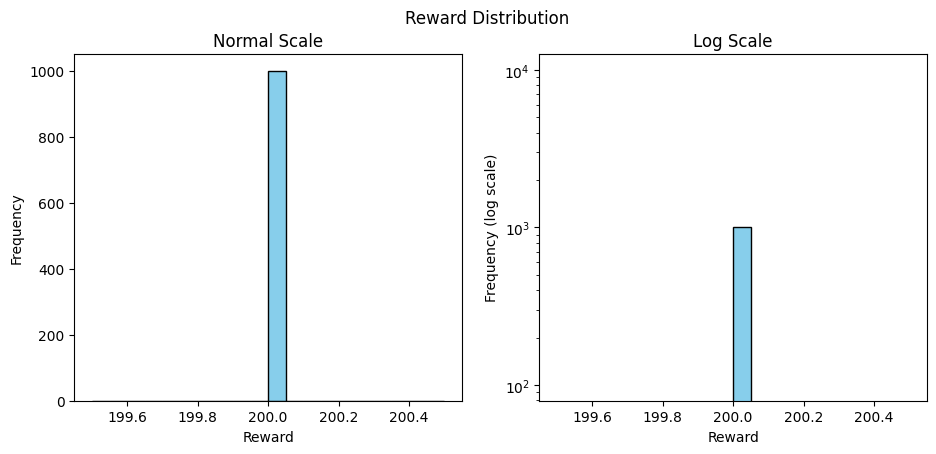

In [9]:
q_trainer.plot_reward_dist(expert_reward)

Running Policy...: 100%|██████████████████████████| 5/5 [00:16<00:00,  3.31s/it]


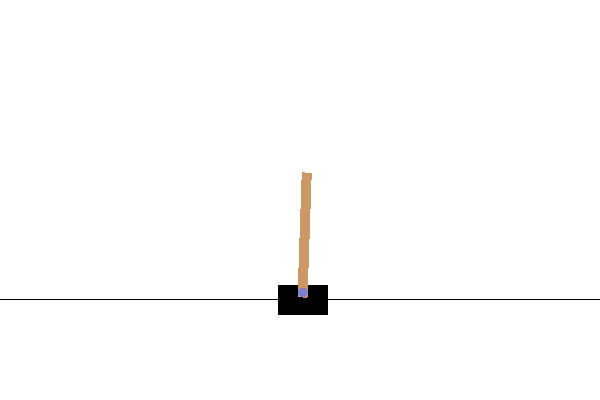

Expert 	 Reward =  [200.0, 200.0, 200.0, 200.0, 200.0]


In [10]:
# Visualize policy in action

expert_reward = q_trainer.run_policy(expert_Q, num_episodes=5, 
                           render=True, render_filename='../Results/Q - Learning IRL/Expert Policy')
print('Expert \t Reward = ',expert_reward)

# IRL Algorithm

* Some functions are defined for the Apprenticeship Inverse Reinforcement Learning (IRL) algorithm based on the paper by  P. Abbeel and A. Y. Ng titled "Apprenticeship Learning via Inverse Reinforcement Learning."

* To train new agents, a modification is made to the Q-learning algorithm. Instead of utilizing the (predefined) returned reward from the training environment, it incorporates the reward function of the expert derived from the IRL algorithm. This reward function involves a weight term (w) and observation space (Φ(s)) obtained through the IRL algorithm.

* To ensure observation features fall within the [0, 1] range for computing feature expectations, sigmoid function is applied to each element of the feature vector.

In [11]:
# sigmoid function

def sigmoid(array):

    return 1 / (1 + np.exp(-array))

In [12]:
def calculate_feature_expectation(Q, num_episodes=1000, gamma=0.9, bins=bins):
    """
    Calculate the average feature expectation using the provided Q-table and environment.

    Parameters:
    - Q: Q-table representing the policy.
    - num_episodes: Number of episodes for feature calculation.
    - gamma: Discount factor for future rewards.
    - bins: Discretization bins for state representation.

    Returns:
    - feature_expectation: Calculated average feature expectation.
    """
    
    observation_sum = np.zeros(len(bins))

    for _ in range(num_episodes):
        observation = env.reset()
        done = False
        count = 0

        while not done:
            state = get_state_as_str(assign_bins(observation, bins))
            action = max(Q[state].items(), key=lambda x: x[1])[0]
            observation, reward, done, _ = env.step(action)
            
            # apply sigmoid function to observation features
            observation = sigmoid(observation)

            # accumulate discounted observation features
            observation_sum += (gamma ** count) * observation
            count += 1

    # average feature expectation
    feature_expectation = observation_sum / num_episodes

    print("Feature Expectation:", feature_expectation)
    
    return feature_expectation

NameError: name 'bins' is not defined

In [ ]:
def irl_episode(Q, bins, weight, epsilon=0.5):
    """
    Simulate one episode using the IRL-modified Q-learning algorithm.

    Parameters:
    - Q: Q-table representing the policy.
    - bins: Discretization bins for state representation.
    - weight: Weight obtained from the IRL algorithm.
    - epsilon: Exploration-exploitation parameter for epsilon-greedy strategy.

    Returns:
    - total_reward: Total reward obtained in the episode.
    - count: Number of moves in the episode.
    """
    
    observation = env.reset()
    done = False
    count = 0  # no. of moves in an episode
    state = get_state_as_str(assign_bins(observation, bins))
    total_reward = 0

    while not done:
        count += 1
        # epsilon-greedy strategy
        if np.random.uniform() < epsilon:
            action = env.action_space.sample()
        else:
            action = max(Q[state].items(), key=lambda x: x[1])[0]

        observation, reward, done, _ = env.step(action)

        state_new = get_state_as_str(assign_bins(observation, bins))

        observation = sigmoid(observation)

        # discard the simulation reward and use the reward function found from the IRL algorithm
        reward = np.dot(weight, observation)     # wT · φ

        total_reward += reward

        if done and count < 200:
            reward = -1

        # Q-learning update
        a1, max_q_s1a1 = max(Q[state_new].items(), key=lambda x: x[1])
        Q[state][action] += ALPHA * (reward + GAMMA * max_q_s1a1 - Q[state][action])
        state, action = state_new, a1

    return total_reward, count

In [ ]:
def q_learning_irl(bins, weight, num_episodes=10000):
    """
    Train the policy using the IRL-modified Q-learning algorithm for multiple episodes.

    Parameters:
    - bins: Discretization bins for state representation.
    - weight: Weight obtained from the IRL algorithm.
    - num_episodes: Number of episodes for training.

    Returns:
    - length: List of episode lengths.
    - reward: List of episode rewards.
    - Q: Final Q-table after training.
    """
    
    Q = init_Q()
    episode_lengths = []
    episode_rewards = []

    for n in tqdm(range(num_episodes), desc='Training with IRL..'):
        epsilon = 1.0 / np.sqrt(n + 1)

        episode_reward, episode_length = irl_episode(Q, bins, weight, epsilon)

        episode_lengths.append(episode_length)
        episode_rewards.append(episode_reward)

    avg_length = np.average(episode_lengths)
    std_dev_length = np.std(episode_lengths)
    
    print(f"Avg Length: {avg_length} \nStandard Deviation: {std_dev_length}")

    return episode_lengths, episode_rewards, Q

In [ ]:
# get feature expectation of expert

expert_Q = load('../Data/Expert_Q_table')

expert_expectation = calculate_feature_expectation(expert_Q, num_episodes=10000)

### IRL algorithm using projection method

In [ ]:
# terminate with margin or iteration
epsilon = 0.0001
N = 11

weight = []
feature_expectation = []
feature_expectation_bar = []
learned_Q = []
margin = []
avg_episode_length = []

for i in range(N):
    print("Iteration:", i)
    
    # Step 1: Initialization
    if i == 0:
        initial_Q = init_Q()  # Random initial policy
        feature_expectation.append(calculate_feature_expectation(initial_Q))
        print("Expert Feature Expectation:", expert_expectation)
        learned_Q.append(initial_Q)
        weight.append(np.zeros(4))
        margin.append(1)
        
    else:
        # Step 2: Iterations
        # First iteration of step 2 of algorithm
        if i == 1:
            feature_expectation_bar.append(feature_expectation[i - 1])
            weight.append(expert_expectation - feature_expectation[i - 1])  # w(i) = μE − μ¯(i−1)
            margin.append(np.linalg.norm((expert_expectation - feature_expectation_bar[i - 1]), 2))  #t(i) = ∥µE − µ¯(i−1)∥_2
            print("Margin:", margin[i])
            print("Weight:", weight[i])
            
        # Iterations 2 and onward of step 2 of algorithm
        else:
            A = feature_expectation_bar[i - 2]                          # µ¯(i−2)
            B = feature_expectation[i - 1] - A                          # (µ(i−1) − µ¯(i−2))
            C = expert_expectation - feature_expectation_bar[i - 2]      # µE − µ¯(i−2)
            
            feature_expectation_bar.append(A + (np.dot(B, C) / np.dot(B, B)) * B)
            
            weight.append(expert_expectation - feature_expectation_bar[i - 1])
            margin.append(np.linalg.norm((expert_expectation - feature_expectation_bar[i - 1]), 2))
            print("Margin:", margin[i])
            print("Weight:", weight[i])
            
        # Step 3: Termination condition
        if margin[i] <= epsilon:
            break

        # Step 4: IRL training
        episode_lengths, episode_rewards, learned_Q_i = q_learning_irl(bins, weight[i])
        learned_Q.append(learned_Q_i)
        avg_episode_length.append(episode_lengths)
        
        # Step 5: Update feature expectation
        feature_expectation.append(calculate_feature_expectation(learned_Q[i]))

    print("")

# export trained IRL model
save(learned_Q, '../Data/Learned_Q_tables')

In [ ]:
# performance of each student
    
for i in range(len(avg_episode_length)):
    student_title = f"Performance: Student {i + 1}"
    plot_performance(avg_episode_length[i], title=student_title, save=True, 
                     filename=f"../Results/Q - Learning IRL/Student_{i + 1}_Performance")

In [ ]:
# Plotting Convergence Rate

plt.plot(margin)
plt.title("L2 Policy Error")
plt.xlabel("Student Number")
plt.ylabel("Squared Error of Features")
plt.yscale("log")
plt.savefig("../Results/Q - Learning IRL/Students Policy Error.png")
plt.show()

In [ ]:
# Showing the performance of each student relative to the expert

iteration = []
relative_performance = []
student_performance = []

# average performance for each student
for episode_lengths in avg_episode_length:
    student_performance.append(np.average(episode_lengths))

for i, performance in enumerate(student_performance):
    iteration.append(i + 1)
    relative_performance.append(performance)

plt.plot(iteration, relative_performance)
plt.xlabel("Student Number")
plt.ylabel("Average Episode Length")
plt.title("Performance Comparison with Expert")
plt.savefig("../Results/Q - Learning IRL/Student Rewards.png")
plt.show()

In [ ]:
for student in range(1, len(avg_episode_length)+1):
    student_reward = run_policy(bins, learned_Q[student], num_episodes=5, 
                           render=True, render_filename=f'../Results/Q - Learning IRL/Student {student} Policy')
    print(f'Student {student} - ', student_reward)